In [3]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
%matplotlib inline 
#new stuff 7/9 for automating process
import os
import os.path
from pathlib2 import Path
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

In [4]:
gmx_surface_areas = ['SA19-1_20ns', 'SA19-2_100ns', 'SA19-3_20ns',
                 'SA19.5_100ns', 'SA19.5-2_20ns', 'SA19.5-3_20ns',
                 'SA20_20ns', 'SA20-2_20ns', 'SA20-3_100ns',
                 'SA21_100ns', 'SA21-2_20ns', 'SA21-3_20ns', 
                 'SA22_20ns', 'SA22-2_20ns', 'SA22-3_100ns', 
                 'SA24_20ns', 'SA24-2_20ns', 'SA24-3_100ns']
namd_surface_areas = ['SA19','SA19-2', 'SA19-3', 
                   'SA19.5','SA19.5-2', 'SA19.5-3',
                   'SA20','SA20-2', 'SA20-3',
                   'SA20.5', 'SA20.5-2', 'SA20.5-3',
                   'SA21','SA21-2', 'SA21-3',
                   'SA22','SA22-2', 'SA22-3',
                   'SA23','SA23-2', 'SA23-3',
                   'SA24', 'SA24-2', 'SA24-3']
namd_filenames = ['step7.1', 'step7.2', 'step7.21', 'step7.3', 'step7.31', 'step7.32', 'step7.33', 'step7.34',
               'step7.35','step7.4', 'step7.41', 'step7.42', 'step7.43', 'step7.44', 'step7.45']
gmx_filenames = []
for g in range(1,21):
    gmx_filenames.append('step9_'+str(g))
filedir_g = '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/'
filedir_n = '/gpfs/amarolab/abbyflabby/MIX/MIX1234_NaCl0.4_NAMD/'
logfiles_n = []
logfiles_g = []
trr_files = []
dcd_files = []

for area in namd_surface_areas:
    logchunk = []
    dcdchunk = []
    for i in namd_filenames:
        log = Path(filedir_n+area+'/charmm-gui/namd/'+i+'_production.log')
        dcd = Path(filedir_n+area+'/charmm-gui/namd/'+i+'_production.dcd')
        if log.exists():
            logchunk.append(filedir_n+area+'/charmm-gui/namd/'+i+'_production.log')
        if dcd.exists():
            dcdchunk.append(filedir_n+area+'/charmm-gui/namd/'+i+'_production.dcd')
    if len(logchunk)>0:
        logfiles_n.append(logchunk)
        dcd_files.append(dcdchunk)
#xvgfiles = [] #list of xvg filenames
pres = []
times = []
areas = []
trr_files = []
#for narea in n_surface_areas:
#    logchunk = []
    
for area in gmx_surface_areas:
    xvgchunk = []
    trajchunk = []
    for i in range(1, 21):
        xvg = Path(filedir_g+area+'/step9_'+str(i)+'.xvg')
        traj = Path(filedir_g+area+'/step9_'+str(i)+'.trr')
        if xvg.exists():
            xvgchunk.append(filedir_g+area+'/step9_'+str(i)+'.xvg')
        if traj.exists():
            trajchunk.append(filedir_g+area+'/step9_'+str(i)+'.trr')
    #print(xvgchunk)
    for p, x in enumerate(xvgchunk):
        if p == 0:
            #arr = np.array(timesteps)
            #timesteps in nanoseconds
            timesteps = np.genfromtxt(x, dtype='float', skip_header=24)[:,0]/1000
            #np.append(timesteps, new_ts)
            pressures = np.genfromtxt(x, dtype='float', skip_header=24)[:,1]/20
            #np.append(pressures, new_pr)
            #print(pressures)
        else:
            time = np.genfromtxt(x,dtype='float', skip_header=24)[:,0]/1000
            #print(time)
            timesteps = np.append(timesteps, time)
      #      #print(time)
      #      #t = time.tolist()
      #      timesteps.append(time)
      #      print(timesteps)
            pr = np.genfromtxt(x, dtype='float', skip_header=24)[:,1]/20
            pressures = np.append(pressures, pr)
    if len(xvgchunk)>0:
        pres.append(70.5-np.array(pressures))
        times.append(timesteps)
        areas.append(area)
        logfiles_g.append(xvgchunk)
        trr_files.append(trajchunk)
#print(len(xvgfiles))
#print(xvgfiles)
print(len(times[1]))
#print(times[1][-1])
print(len(pres[1]))
#print(len(times))
print(areas)

59520
59520
['SA19-1_20ns', 'SA19-2_100ns', 'SA19-3_20ns', 'SA19.5_100ns', 'SA19.5-2_20ns', 'SA19.5-3_20ns', 'SA20_20ns', 'SA20-2_20ns', 'SA20-3_100ns', 'SA21_100ns', 'SA21-2_20ns', 'SA21-3_20ns', 'SA22_20ns', 'SA22-2_20ns', 'SA22-3_100ns', 'SA24_20ns', 'SA24-2_20ns', 'SA24-3_100ns']


In [5]:
def getIncrementedData(step, x, y):
    newx = []
    newy = []
    yerr = []
    #print length of new arrays
    length = len(x)/step
    #l2 = len(y)/step
    #print(length)
    #print(l2)
    L = 0
    while L < length-1:
        #print(L)
        #print(length-1)
        #print(length)
        newx.append(x[(L+1)*step])
        #why = y[(L*step):(L+1)*step]
        #print(len(x))
        #print(x)
        #print(L*step)
        #print((L+1)*step)
        newy.append(np.mean(y[(L*step):(L+1)*step]))
        #print(newy)
        yerr.append(np.std(y[(L*step):(L+1)*step]))
        L+=1
    return(newx, newy, yerr)

In [6]:
def getMeanData():
    chunk = []
    for p in pres:
        chunk.append(np.mean(p))
    return chunk
L = getMeanData()

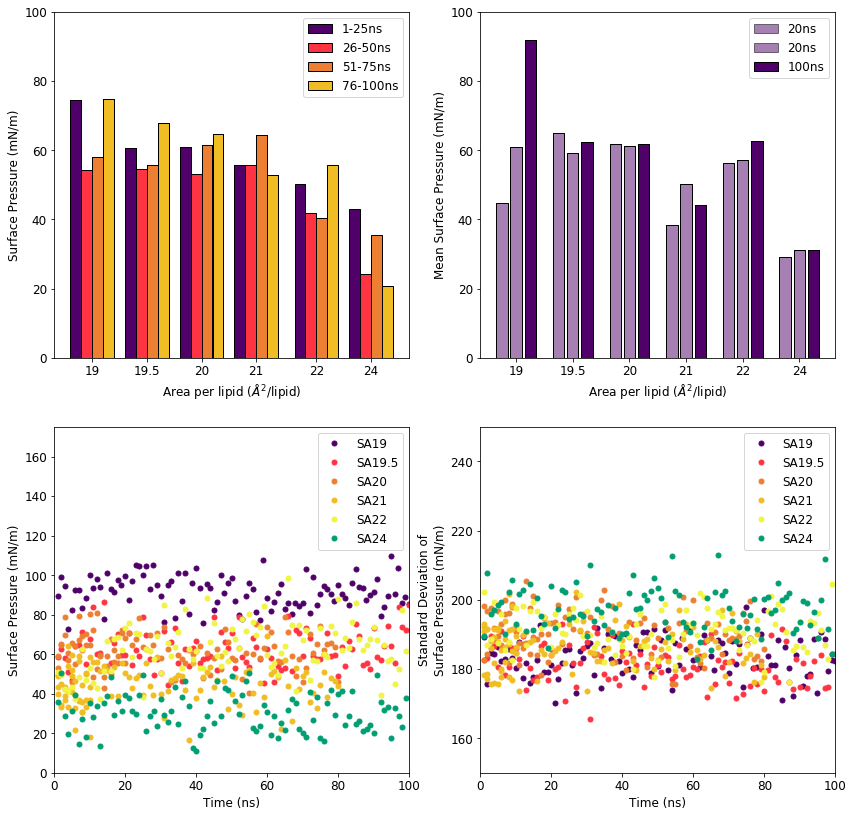

In [11]:
black = '#000000'
yellow = '#F0F442'
orange = '#ec7f31'
#gold = '#E69F00'
gold = '#f0bd24'
green = '#009E73'
dblue = '#0072B2'
lblue = '#56B4E9'
pink = '#F6BBCA'
red = '#FF3442'
purple = '#4f0069'
lgreen = '#00ff99'
c = [purple, red, orange, gold, yellow, green, lgreen, dblue, lblue, pink]



#Combining all four plots together into a single figure
plt.figure(figsize=(14,14))

#first quadrant is 100ns convergence bar graph
grid = plt.GridSpec(2, 2)
plt.subplot(grid[0,0])
w = 20
ec='k'
a = 1.0
#print(times[2][-1])
#print(len(times[2]))
plt.xticks([30, 130, 230, 330, 440, 540], ('19', '19.5', '20', '21', '22', '24'))
A,B,C = getIncrementedData(1000, times[2]/100, pres[2])
#plt.title('Convergence Analysis')
plt.ylabel('Surface Pressure (mN/m)')
plt.xlabel('Area per lipid ($\AA^2$/lipid)')

plt.bar(A[0], B[0], width=w, color=c[0], alpha=a, label='1-25ns', edgecolor = ec)
plt.bar(A[0], B[0], width=w, color = 'none', edgecolor = ec)
plt.bar(A[1]+20, B[1], width=w, color=c[1], alpha=a, label='26-50ns', edgecolor = ec)
plt.bar(A[1]+20, B[1], width=w, color = 'none', edgecolor = ec)
plt.bar(A[2]+40, B[2], width=w, color=c[2], alpha=a, label='51-75ns', edgecolor = ec)
plt.bar(A[2]+40, B[2], width=w, color = 'none', edgecolor = ec)
plt.bar(A[3]+60, B[3], width=w, color=c[3], alpha=a, label='76-100ns', edgecolor = ec)
plt.bar(A[3]+60, B[3], width=w, color = 'none', edgecolor = ec)

D,E,F = getIncrementedData(1000, times[3]/100, pres[3])
plt.bar(D[0]+100, E[0], width=w, color=c[0], alpha=a,  edgecolor = ec)
plt.bar(D[0]+100, E[0], width=w, color = 'none', edgecolor = ec)
plt.bar(D[1]+120, E[1], width=w, color=c[1], alpha=a,  edgecolor = ec)
plt.bar(D[1]+120, E[1], width=w, color = 'none', edgecolor = ec)
plt.bar(D[2]+140, E[2], width=w, color=c[2], alpha=a,  edgecolor = ec)
plt.bar(D[2]+140, E[2], width=w, color = 'none', edgecolor = ec)
plt.bar(D[3]+160, E[3], width=w, color=c[3], alpha=a, edgecolor = ec)
plt.bar(D[3]+160, E[3], width=w, color = 'none', edgecolor = ec)

G,H,I = getIncrementedData(1000, times[6]/100, pres[6])
plt.bar(G[0]+200, H[0], width=w, color=c[0], alpha=a,  edgecolor = ec)
plt.bar(G[0]+200, H[0], width=w, color = 'none', edgecolor = ec)
plt.bar(G[1]+220, H[1], width=w, color=c[1], alpha=a,  edgecolor = ec)
plt.bar(G[1]+220, H[1], width=w, color = 'none', edgecolor = ec)
plt.bar(G[2]+240, H[2], width=w, color=c[2], alpha=a,  edgecolor = ec)
plt.bar(G[2]+240, H[2], width=w, color = 'none', edgecolor = ec)
plt.bar(G[3]+260, H[3], width=w, color=c[3], alpha=a, edgecolor = ec)
plt.bar(G[3]+260, H[3], width=w, color = 'none', edgecolor = ec)

J,K,L = getIncrementedData(1000, times[7]/100, pres[7])
plt.bar(J[0]+300, K[0], width=w, color=c[0], alpha=a, edgecolor = ec)
plt.bar(J[0]+300, K[0], width=w, color = 'none', edgecolor = ec)
plt.bar(J[1]+320, K[1], width=w, color=c[1], alpha=a, edgecolor = ec)
plt.bar(J[1]+320, K[1], width=w, color = 'none', edgecolor = ec)
plt.bar(J[2]+340, K[2], width=w, color=c[2], alpha=a, edgecolor = ec)
plt.bar(J[2]+340, K[2], width=w, color = 'none', edgecolor = ec)
plt.bar(J[3]+360, K[3], width=w, color=c[3], alpha=a, edgecolor = ec)
plt.bar(J[3]+360, K[3], width=w, color = 'none', edgecolor = ec)


M,N,O = getIncrementedData(1000, np.arange(0, 500, 0.01), pres[14])
plt.bar(M[0]+400, N[0], width=w, color=c[0], alpha=a, edgecolor = ec)
plt.bar(M[1]+410, N[1], width=w, color=c[1], alpha=a, edgecolor = ec)
plt.bar(M[2]+420, N[2], width=w, color=c[2], alpha=a, edgecolor = ec)
plt.bar(M[3]+430, N[3], width=w, color=c[3], alpha=a, edgecolor = ec)

M,N,O = getIncrementedData(1000, np.arange(0, 500, 0.01), pres[17])
plt.bar(M[0]+500, N[0], width=w, color=c[0], alpha=a, edgecolor = ec)
plt.bar(M[1]+510, N[1], width=w, color=c[1], alpha=a, edgecolor = ec)
plt.bar(M[2]+520, N[2], width=w, color=c[2], alpha=a, edgecolor = ec)
plt.bar(M[3]+530, N[3], width=w, color=c[3], alpha=a, edgecolor = ec)

#plt.plot([0, 75], [np.mean(pres[2]), np.mean(pres[2])], color='k', ls='dashed')
#plt.plot([100, 200], [np.mean(pres[3]), np.mean(pres[3])], color='k', ls='dashed')
#plt.plot([200, 300], [np.mean(pres[6]), np.mean(pres[6])], color='k', ls='dashed')
#plt.plot([300, 400], [np.mean(pres[7]), np.mean(pres[7])], color='k', ls='dashed')
plt.legend(loc=1)
plt.ylim(0,100)

#avg. surface pressure bar graph
plt.subplot(grid[0,1])
w = 20
ec = 'k'
a = 1
M = getMeanData()
plt.xticks([2, 6, 10, 14, 18, 22], ('19', '19.5', '20', '21', '22', '24'))
#plt.title('Convergence Analysis')
plt.ylabel('Mean Surface Pressure (mN/m)')
plt.xlabel('Area per lipid ($\AA^2$/lipid)')
#SA19
plt.bar(1, M[0], color = c[0], alpha = 0.5, label='20ns', edgecolor = ec)#20ns
plt.bar(1, M[0], color = 'none', edgecolor = ec)#20ns
plt.bar(2, M[2], color = c[0], alpha=0.5, label='20ns', edgecolor = ec)#20ns
plt.bar(2, M[2], color = 'none', edgecolor = ec)#20ns
plt.bar(3, M[1], color = c[0], alpha = a, label='100ns', edgecolor = ec)#100ns
plt.bar(3, M[1], color = 'none', edgecolor = ec)#20ns
#SA19.5 
plt.bar(5, M[4], color = c[0], alpha = 0.5, edgecolor = ec)#20ns
plt.bar(5, M[4], color = 'none', edgecolor = ec)#20ns
plt.bar(6, M[5], color = c[0], alpha=0.5, edgecolor = ec)#20ns
plt.bar(6, M[5], color = 'none', edgecolor = ec)#20ns
plt.bar(7, M[3], color = c[0], alpha = a, edgecolor = ec)#100ns
plt.bar(7, M[3], color = 'none', edgecolor = ec)#100ns
#SA20
plt.bar(9, M[6], color = c[0], alpha = 0.5, edgecolor = ec)#20ns
plt.bar(9, M[6], color = 'none', edgecolor = ec)#20ns
plt.bar(10, M[7], color = c[0], alpha=0.5, edgecolor = ec)#20ns
plt.bar(10, M[7], color = 'none', edgecolor = ec)#100ns
plt.bar(11, M[8], color = c[0], alpha = a, edgecolor = ec)#100ns
plt.bar(11, M[8], color = 'none', edgecolor = ec)#100ns
#SA21
plt.bar(13, M[10], color = c[0], alpha = 0.5, edgecolor = ec)#20ns
plt.bar(13, M[10], color = 'none', edgecolor = ec)#20ns
plt.bar(14, M[11], color = c[0], alpha=0.5, edgecolor = ec)#20ns
plt.bar(14, M[11], color = 'none', edgecolor = ec)#20ns
plt.bar(15, M[9], color = c[0], alpha = a, edgecolor = ec)#100ns
plt.bar(15, M[9], color = 'none', edgecolor = ec)#100ns
#SA22
plt.bar(17, M[12], color = c[0], alpha = 0.5, edgecolor = ec)#20ns
plt.bar(17, M[12], color = 'none', edgecolor = ec)#20ns
plt.bar(18, M[13], color = c[0],alpha=0.5,  edgecolor = ec)#20ns
plt.bar(18, M[13], color = 'none', edgecolor = ec)#20ns
plt.bar(19, M[14], color = c[0],alpha=a,  edgecolor = ec)#100ns
plt.bar(19, M[14], color = 'none', edgecolor = ec)#100ns
#SA24
plt.bar(21, M[15], color = c[0], alpha = 0.5, edgecolor = ec)#20ns
plt.bar(21, M[15], color = 'none', edgecolor = ec)
plt.bar(22, M[16], color = c[0], alpha=0.5, edgecolor = ec)
plt.bar(22, M[16], color = 'none', edgecolor = ec)
plt.bar(23, M[17], color = c[0], alpha=1, edgecolor = ec)
plt.bar(23, M[17], color = 'none', edgecolor = ec)

plt.legend(loc=1)
plt.ylim(0,100)

#Scatter plot 100ns traj no error bars 
plt.subplot(grid[1,0])
plt.xlabel('Time (ns)')
plt.ylabel('Surface Pressure (mN/m)')
N,O,P = getIncrementedData(500, times[1], pres[1])
plt.errorbar(N,O, color=c[0], ls='none', marker='.',ms=10, elinewidth=1, label='SA19')
timesnn = np.arange(0, 100.01, 0.002)
nn,rr,ss = getIncrementedData(500, timesnn, pres[3])
#print(rr[0])
#print(len(rr))
plt.errorbar(nn,rr, color=c[1], ls='none', marker='.',ms=10, elinewidth=1, label='SA19.5')
T,U,V = getIncrementedData(500, times[8], pres[8])
plt.errorbar(T,U, color=c[2], ls='none', marker='.',ms=10, elinewidth=1, label='SA20')
W,X,Y = getIncrementedData(500, times[9], pres[9])
plt.errorbar(W,X, color=c[3],  ls='none', marker='.', ms=10, elinewidth=1, label='SA21')
aa,bb,cc = getIncrementedData(500, np.arange(0,100,0.002), pres[14])
plt.errorbar(aa,bb, color=c[4], ls='none', marker='.', ms=10, elinewidth=1, label='SA22')

aa,bb,cc = getIncrementedData(500, np.arange(0,100,0.002), pres[17])
plt.errorbar(aa,bb, color=c[5], ls='none', marker='.', ms=10, elinewidth=1, label='SA24')
plt.legend(loc=1)
plt.ylim(0,175)
plt.xlim(0,100)

#plot of standard deviation of 100ns traj
plt.subplot(grid[1,1])
plt.xlabel('Time (ns)')
plt.ylabel('Standard Deviation of\nSurface Pressure (mN/m)')
N,O,P = getIncrementedData(500, times[1], pres[1])
plt.errorbar(N,P, color=c[0], ls='none', marker='.', ms=10,markeredgecolor=c[0], elinewidth=1, label='SA19')
nn,rr,ss = getIncrementedData(500, timesnn, pres[3])
timesnn = np.arange(0, 100.01, 0.002)
plt.errorbar(nn,ss, color=c[1], ecolor='crimson', ls='none', marker='.', ms=10,markeredgecolor=c[1], elinewidth=1, label='SA19.5')
T,U,V = getIncrementedData(500, times[8], pres[8])
plt.errorbar(T,V, color=c[2], ecolor='darkcyan', ls='none', marker='.', ms=10,markeredgecolor=c[2], elinewidth=1, label='SA20')
W,X,Y = getIncrementedData(500, times[9], pres[9])
plt.errorbar(W,Y, color=c[3], ecolor='darkgoldenrod', ls='none', marker='.', ms=10,markeredgecolor=c[3], elinewidth=1, label='SA21')
aa,bb,cc = getIncrementedData(500, np.arange(0,100,0.002), pres[14])
plt.errorbar(aa,cc, color=c[4], ls='none', marker='.', ms=10,markeredgecolor=c[4], elinewidth=1, label='SA22')
aa,bb,cc = getIncrementedData(500, np.arange(0,100,0.002), pres[17])
plt.errorbar(aa,cc, color=c[5], ls='none', marker='.', ms=10,markeredgecolor=c[5], elinewidth=1, label='SA24')

plt.legend(loc=1)
plt.ylim(150,250)
plt.xlim(0,100)
plt.savefig('/home/adommer/Desktop/convergence_combined_figure.png', dpi=300)